In [1]:
from opcua import Client
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re
import plotly.express as px
import icalendar
from datetime import datetime
import pytz


cryptography is not installed, use of crypto disabled
cryptography is not installed, use of crypto disabled
C:\Users\Jolly\AppData\Local\Temp\ipykernel_15732\3605758644.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## dataset graphs KMeans

In [2]:
df = pd.read_csv('datas/EnMPRO_Suddivisione consumi (1).csv', sep=';' )

In [3]:
df.drop(0, inplace=True)


In [4]:
df.head()

,LOKAL_DATUM,MSJO_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh
1,12/23/2023 2:00:00 AM,12/23/2023 1:00:00 AM,11.460969,0.026612,0.115566,0.217616,11.820764
2,12/23/2023 3:00:00 AM,12/23/2023 2:00:00 AM,11.904545,0.026579,0.281918,0.212335,12.425377
3,12/23/2023 4:00:00 AM,12/23/2023 3:00:00 AM,11.436480,0.026561,0.365146,0.215678,12.043865
4,12/23/2023 5:00:00 AM,12/23/2023 4:00:00 AM,11.418350,0.026552,0.365181,0.364989,12.175072
5,12/23/2023 6:00:00 AM,12/23/2023 5:00:00 AM,11.499769,0.026525,0.365099,0.227283,12.118677


In [5]:
#datetime 1/1/2024 12:15:00 AM
# Converti la colonna LOKAL_DATUM in am pm 
df['LOKAL_DATUM'] = pd.to_datetime(df['LOKAL_DATUM'], format='%m/%d/%Y %I:%M:%S %p')
# db['LOKAL_DATUM'] = pd.to_datetime(db['LOKAL_DATUM'], format='%d/%m/%Y %H:%M:%S')

In [6]:

df.head(10)

,LOKAL_DATUM,MSJO_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh
1,2023-12-23 02:00:00,12/23/2023 1:00:00 AM,11.460969,0.026612,0.115566,0.217616,11.820764
2,2023-12-23 03:00:00,12/23/2023 2:00:00 AM,11.904545,0.026579,0.281918,0.212335,12.425377
3,2023-12-23 04:00:00,12/23/2023 3:00:00 AM,11.436480,0.026561,0.365146,0.215678,12.043865
4,2023-12-23 05:00:00,12/23/2023 4:00:00 AM,11.418350,0.026552,0.365181,0.364989,12.175072
5,2023-12-23 06:00:00,12/23/2023 5:00:00 AM,11.499769,0.026525,0.365099,0.227283,12.118677
6,2023-12-23 07:00:00,12/23/2023 6:00:00 AM,11.463700,0.026527,0.365207,0.212687,12.068120
7,2023-12-23 08:00:00,12/23/2023 7:00:00 AM,11.822470,0.026601,0.482935,0.217266,12.549271
8,2023-12-23 09:00:00,12/23/2023 8:00:00 AM,11.694340,0.026689,0.485297,0.214914,12.421239
9,2023-12-23 10:00:00,12/23/2023 9:00:00 AM,11.647584,0.026761,0.485415,0.216352,12.376111
10,2023-12-23 11:00:00,12/23/2023 10:00:00 AM,11.676012,0.026731,0.485200,0.215181,12.403123


In [7]:
#  drop column mjsorhefa
df = df.drop(columns=['MSJO_DATUM'])


In [8]:
df.head(10)

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh
1,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764
2,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377
3,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865
4,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072
5,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677
6,2023-12-23 07:00:00,11.463700,0.026527,0.365207,0.212687,12.068120
7,2023-12-23 08:00:00,11.822470,0.026601,0.482935,0.217266,12.549271
8,2023-12-23 09:00:00,11.694340,0.026689,0.485297,0.214914,12.421239
9,2023-12-23 10:00:00,11.647584,0.026761,0.485415,0.216352,12.376111
10,2023-12-23 11:00:00,11.676012,0.026731,0.485200,0.215181,12.403123


In [9]:
df.describe()

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh
count,1487,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,2024-01-23 01:00:00,14.006855,0.357797,1.053451,0.435303,15.853407
min,2023-12-23 02:00:00,11.303001,0.026372,0.090726,0.066003,11.658710
25%,2024-01-07 13:30:00,11.763519,0.026676,0.363349,0.211692,12.882841
50%,2024-01-23 01:00:00,12.655322,0.026845,0.499077,0.217683,13.329271
75%,2024-02-07 12:30:00,14.425134,0.792260,1.230870,0.615205,18.174423
max,2024-02-23 00:00:00,26.135410,1.842074,8.380690,2.071054,35.245549
std,NaN,3.400820,0.505899,1.293132,0.424001,4.680172


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 1 to 1487
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   LOKAL_DATUM                                  1487 non-null   datetime64[ns]
 1   m_Consumo_area_Tecnica_KWh                   1487 non-null   float64       
 2   m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh     1487 non-null   float64       
 3   m_Consumo_GEN_Luci_Area_Energy_KWh           1487 non-null   float64       
 4   m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh  1487 non-null   float64       
 5   m_Consumo_Generale_QGBT_KWh                  1487 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 69.8 KB


In [11]:
grafici = df.copy()

In [12]:
grafici.head(10)

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh
1,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764
2,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377
3,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865
4,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072
5,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677
6,2023-12-23 07:00:00,11.463700,0.026527,0.365207,0.212687,12.068120
7,2023-12-23 08:00:00,11.822470,0.026601,0.482935,0.217266,12.549271
8,2023-12-23 09:00:00,11.694340,0.026689,0.485297,0.214914,12.421239
9,2023-12-23 10:00:00,11.647584,0.026761,0.485415,0.216352,12.376111
10,2023-12-23 11:00:00,11.676012,0.026731,0.485200,0.215181,12.403123


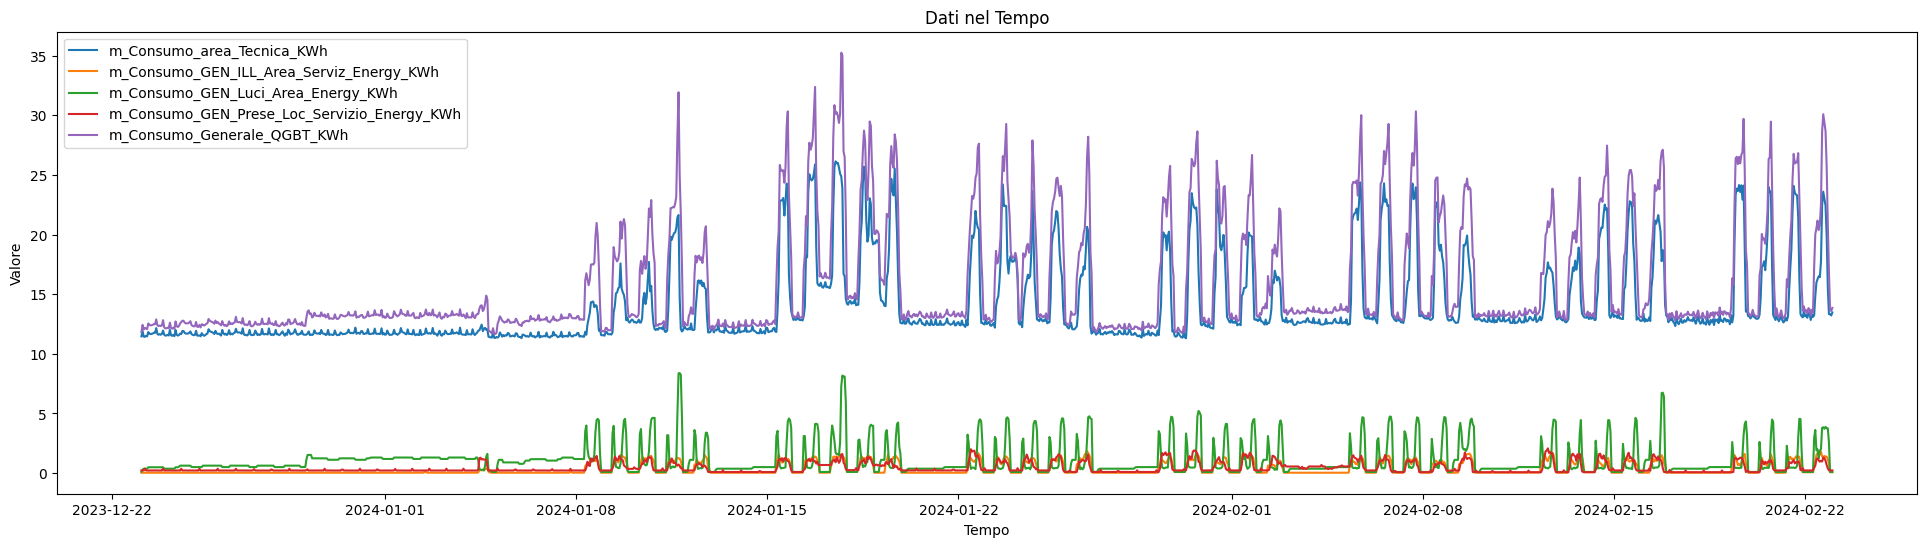

In [13]:

grafici['LOKAL_DATUM'] = pd.to_datetime(grafici['LOKAL_DATUM'], format='%Y-%m-%d %H:%M:%S')

# Imposta la colonna 'LOKAL_DATUM' come indice del DataFrame
grafici.set_index('LOKAL_DATUM', inplace=True)

# Crea un grafico temporale delle colonne di interesse
plt.figure(figsize=(24, 6))

for column in grafici.columns:
    plt.plot(grafici.index, grafici[column], label=column)

plt.title('Dati nel Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valore')
plt.legend()
plt.show()

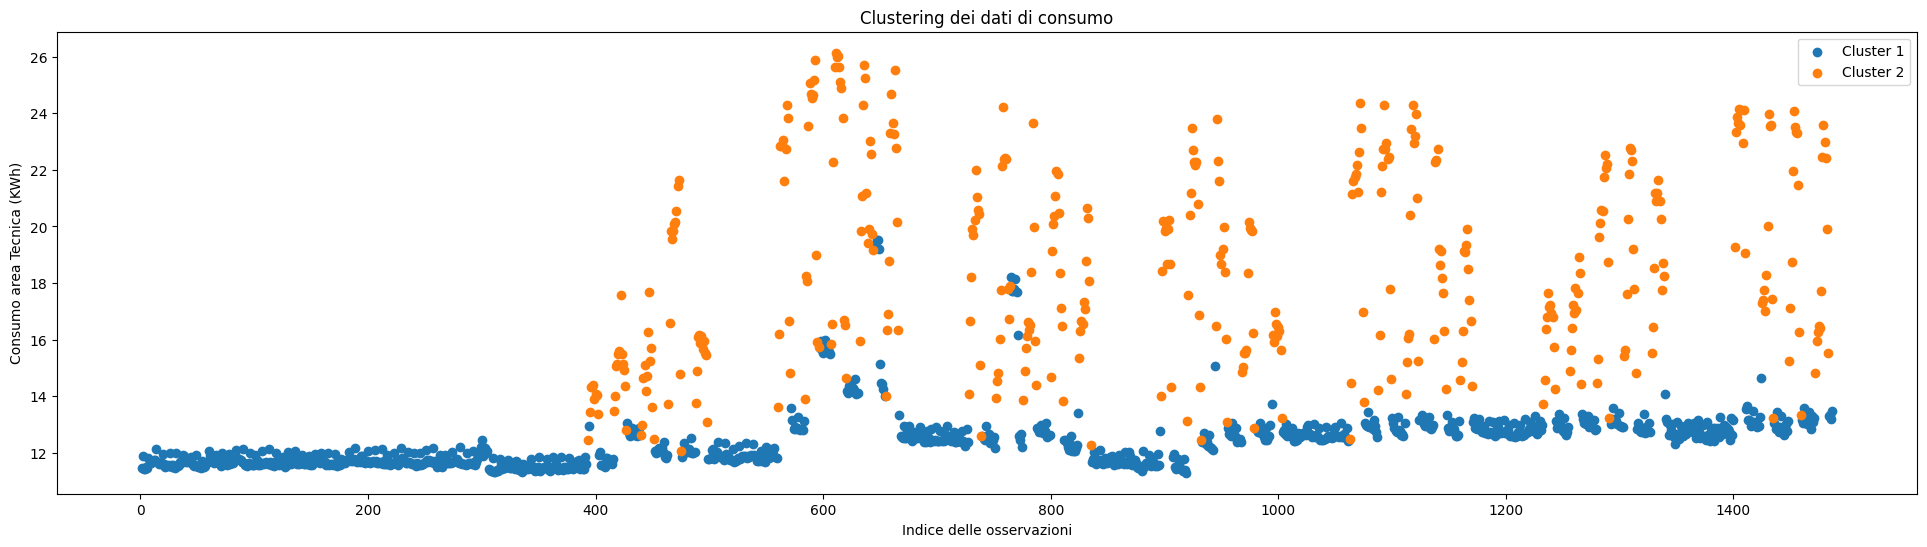

In [14]:
# Seleziona le colonne relevanti per il clustering
X = df[['m_Consumo_area_Tecnica_KWh', 'm_Consumo_GEN_ILL_Area_Serviz_Energy_KWh',
        'm_Consumo_GEN_Luci_Area_Energy_KWh', 'm_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh']]

# Normalizza i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applica l'algoritmo K-Means
n_clusters = 2
kmeans = KMeans(n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Set the figure size
plt.figure(figsize=(24, 6))

# Visualizza i risultati
for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['m_Consumo_area_Tecnica_KWh'], label=f'Cluster {cluster + 1}')

plt.title('Clustering dei dati di consumo')
plt.xlabel('Indice delle osservazioni')
plt.ylabel('Consumo area Tecnica (KWh)')
plt.legend()
plt.show()


In [15]:
# Seleziona le colonne relevanti per il clustering
X = df[['m_Consumo_area_Tecnica_KWh', 'm_Consumo_GEN_ILL_Area_Serviz_Energy_KWh',
        'm_Consumo_GEN_Luci_Area_Energy_KWh', 'm_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh']]

# Normalizza i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applica l'algoritmo K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizza i risultati con Plotly
fig = px.scatter(df, x=df.index, y='m_Consumo_area_Tecnica_KWh', color='cluster',
                 labels={'m_Consumo_area_Tecnica_KWh': 'Consumo area Tecnica (KWh)', 'index': 'Indice delle osservazioni'},
                 title='Clustering dei dati di consumo', color_continuous_scale='Viridis')

fig.show()

## implementazione con calendari

### Visite

In [16]:
calendar = pd.read_csv('datas/visite made.CSV', sep=',')

In [17]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Oggetto                          861 non-null    object 
 1   Data inizio                      861 non-null    object 
 2   Ora inizio                       861 non-null    object 
 3   Data fine                        861 non-null    object 
 4   Ora fine                         861 non-null    object 
 5   Giornata intera                  861 non-null    object 
 6   Promemoria attivato/disattivato  861 non-null    object 
 7   Data promemoria                  861 non-null    object 
 8   Ora promemoria                   861 non-null    object 
 9   Organizzatore riunione           229 non-null    object 
 10  Partecipanti necessari           844 non-null    object 
 11  Partecipanti facoltativi         288 non-null    object 
 12  Risorse riunione      

In [18]:
pd.options.display.max_columns= 30
calendar.head()

,Oggetto,Data inizio,Ora inizio,Data fine,Ora fine,Giornata intera,Promemoria attivato/disattivato,Data promemoria,Ora promemoria,Organizzatore riunione,Partecipanti necessari,Partecipanti facoltativi,Risorse riunione,Categorie,Dati fatturazione,Descrizione,Indennità trasferta,Luogo,Mostra ora come,Priorità,Privato,Riservatezza
0,opzione evento GSOM,27/5/2024,09:00:00,27/5/2024,18:00:00,Falso,Falso,27/5/2024,08:45:00,Aurora Mariani,Auditorium;Visite MADE,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,1,Normale,Falso,Normale
1,Opzione corso SICAD,5/3/2024,09:00:00,5/3/2024,18:00:00,Falso,Vero,5/3/2024,08:45:00,Martina Facciolo,Visite MADE,NaN,NaN,NaN,NaN,\r\n\r\n \r\n\r\n,NaN,Aula Formazione 3,1,Normale,Falso,Normale
2,Demo Experience - contenuti da definire,21/11/2024,09:00:00,21/11/2024,14:00:00,Falso,Falso,21/11/2024,08:45:00,NaN,Aurora Mariani;Visite MADE;Auditorium;Davide P...,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,2,Normale,Falso,Normale
3,Demo Experience - contenuti da definire,24/10/2024,09:00:00,24/10/2024,14:00:00,Falso,Falso,24/10/2024,08:45:00,NaN,Aurora Mariani;Visite MADE;Auditorium;Davide P...,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,2,Normale,Falso,Normale
4,Demo Experience - contenuti da definire,19/9/2024,09:00:00,19/9/2024,14:00:00,Falso,Falso,19/9/2024,08:45:00,NaN,Aurora Mariani;Visite MADE;Auditorium;Davide P...,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,2,Normale,Falso,Normale


In [19]:
for i in range(len(calendar)):
    try:
        x = calendar.loc[i, 'Partecipanti necessari']
        if isinstance(x, str):
            x = x.split(';')[0]
        else:
            x = calendar.loc[i, 'Organizzatore riunione']
        if x == '0          Andrea Capelletti':
            x = 'Andrea Capelletti'
        calendar.loc[i, 'Organizzatore riunione'] = x
    except Exception as e:
        print("Errore:", e)


In [20]:
calendar['Organizzatore riunione'].unique()

array(['Auditorium', 'Visite MADE', 'Aurora Mariani', 'Martina Facciolo',
       'Chiara Bonelli', 'Valentina Riso', 'Davide Polotto',
       'Emanuele Chierichetti', 'Maria Rossetti', 'Giambattista Gruosso',
       'Facilities MADE', 'Massimo Giardiello', 'Federico Ravasio',
       'Monica Rossi', 'Samuele Bonalumi', 'Ufficio 3',
       'Augusto De Castro', 'Fabrizio Pozzato', 'Matteo Barbarossa',
       'Alessandro Favalli', 'Camilla Padovan', 'Andrea Capelletti',
       'Desirè Clerici', 'Gianmaria Peruzzi', 'Ottavia Villain',
       'Adalberto Polenghi', 'Dario La Carrubba', 'CentroEniPoliMi', nan,
       'gpisani@gpisani.com', 'Marco Taisch',
       'Massimiliano Pietro Giovanni Annoni', 'Filippo Boschi',
       'claudio.turrin.work@gmail.com', 'Massimiliano Gaglione',
       'Marta Rispoli', 'MADE - Staff', 'Virginia Delodovici',
       'Camilla Cerioli', 'Comunicazione e Formazione MADE',
       'Leonardo Lanzara', 'Fabio Foglia', 'Jessica Scodro',
       'Aula Formazione 1', 'U

In [21]:
calendar.head()

,Oggetto,Data inizio,Ora inizio,Data fine,Ora fine,Giornata intera,Promemoria attivato/disattivato,Data promemoria,Ora promemoria,Organizzatore riunione,Partecipanti necessari,Partecipanti facoltativi,Risorse riunione,Categorie,Dati fatturazione,Descrizione,Indennità trasferta,Luogo,Mostra ora come,Priorità,Privato,Riservatezza
0,opzione evento GSOM,27/5/2024,09:00:00,27/5/2024,18:00:00,Falso,Falso,27/5/2024,08:45:00,Auditorium,Auditorium;Visite MADE,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,1,Normale,Falso,Normale
1,Opzione corso SICAD,5/3/2024,09:00:00,5/3/2024,18:00:00,Falso,Vero,5/3/2024,08:45:00,Visite MADE,Visite MADE,NaN,NaN,NaN,NaN,\r\n\r\n \r\n\r\n,NaN,Aula Formazione 3,1,Normale,Falso,Normale
2,Demo Experience - contenuti da definire,21/11/2024,09:00:00,21/11/2024,14:00:00,Falso,Falso,21/11/2024,08:45:00,Aurora Mariani,Aurora Mariani;Visite MADE;Auditorium;Davide P...,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,2,Normale,Falso,Normale
3,Demo Experience - contenuti da definire,24/10/2024,09:00:00,24/10/2024,14:00:00,Falso,Falso,24/10/2024,08:45:00,Aurora Mariani,Aurora Mariani;Visite MADE;Auditorium;Davide P...,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,2,Normale,Falso,Normale
4,Demo Experience - contenuti da definire,19/9/2024,09:00:00,19/9/2024,14:00:00,Falso,Falso,19/9/2024,08:45:00,Aurora Mariani,Aurora Mariani;Visite MADE;Auditorium;Davide P...,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,2,Normale,Falso,Normale


In [22]:
calendario = calendar.drop(columns=['Giornata intera', "Mostra ora come", "Indennità trasferta", "Oggetto", 'Promemoria attivato/disattivato', "Priorità", "Dati fatturazione", "Risorse riunione", "Categorie", "Partecipanti facoltativi", 'Data promemoria', 'Ora promemoria', "Privato", 'Partecipanti necessari', "Riservatezza"])

In [23]:
calendario.head()

,Data inizio,Ora inizio,Data fine,Ora fine,Organizzatore riunione,Descrizione,Luogo
0,27/5/2024,09:00:00,27/5/2024,18:00:00,Auditorium,NaN,Auditorium
1,5/3/2024,09:00:00,5/3/2024,18:00:00,Visite MADE,\r\n\r\n \r\n\r\n,Aula Formazione 3
2,21/11/2024,09:00:00,21/11/2024,14:00:00,Aurora Mariani,NaN,Auditorium
3,24/10/2024,09:00:00,24/10/2024,14:00:00,Aurora Mariani,NaN,Auditorium
4,19/9/2024,09:00:00,19/9/2024,14:00:00,Aurora Mariani,NaN,Auditorium


In [24]:
len(calendar['Organizzatore riunione'].unique().tolist())

51

In [25]:
calendar["Mostra ora come"].value_counts()

Mostra ora come
2    787
1     62
3     12
Name: count, dtype: int64

In [26]:
# calendar["Mostra ora come"] == 2
#  print the rows where the value is 2
calendar[calendar["Mostra ora come"] == 1]

,Oggetto,Data inizio,Ora inizio,Data fine,Ora fine,Giornata intera,Promemoria attivato/disattivato,Data promemoria,Ora promemoria,Organizzatore riunione,Partecipanti necessari,Partecipanti facoltativi,Risorse riunione,Categorie,Dati fatturazione,Descrizione,Indennità trasferta,Luogo,Mostra ora come,Priorità,Privato,Riservatezza
0,opzione evento GSOM,27/5/2024,09:00:00,27/5/2024,18:00:00,Falso,Falso,27/5/2024,08:45:00,Auditorium,Auditorium;Visite MADE,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,1,Normale,Falso,Normale
1,Opzione corso SICAD,5/3/2024,09:00:00,5/3/2024,18:00:00,Falso,Vero,5/3/2024,08:45:00,Visite MADE,Visite MADE,NaN,NaN,NaN,NaN,\r\n\r\n \r\n\r\n,NaN,Aula Formazione 3,1,Normale,Falso,Normale
38,SPS,28/5/2024,02:00:00,31/5/2024,02:00:00,Vero,Falso,28/5/2024,01:45:00,Visite MADE,Visite MADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Normale,Falso,Normale
50,opzione evento post World Manufacturing Forum,28/11/2023,13:00:00,28/11/2023,18:00:00,Falso,Falso,28/11/2023,12:45:00,Visite MADE,Visite MADE;Auditorium;Alessandro Favalli,NaN,NaN,NaN,NaN,tbd \r\n,NaN,NaN,1,Normale,Falso,Normale
51,Corso di radiolocalizzazione - Programma “Lab ...,26/10/2023,09:00:00,26/10/2023,18:00:00,Falso,Falso,26/10/2023,08:45:00,Visite MADE,Visite MADE;Auditorium,NaN,NaN,NaN,NaN,AREA 2 BLOCCATA - 10 studenti \r\n,NaN,NaN,1,Normale,Falso,Normale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,DEMO EXPERIENCE Sostenibilità,17/5/2023,14:30:00,17/5/2023,18:00:00,Falso,Falso,17/5/2023,14:15:00,Visite MADE,Visite MADE,NaN,NaN,NaN,NaN,1.\tIntervento di scenario ( M Taisch )\r\n2....,NaN,Riunione di Microsoft Teams; Auditorium,1,Normale,Falso,Normale
557,Allestimento e prove tecniche - Forum Fabbrica...,17/5/2023,15:30:00,17/5/2023,18:00:00,Falso,Falso,17/5/2023,15:15:00,Aurora Mariani,Aurora Mariani;Auditorium;Visite MADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Normale,Falso,Normale
596,Allestimento 3P per evento RSE,4/5/2023,14:00:00,4/5/2023,18:00:00,Falso,Falso,4/5/2023,13:45:00,Martina Facciolo,Martina Facciolo;Visite MADE;Auditorium,NaN,NaN,NaN,NaN,\r\n\r\n,NaN,Auditorium,1,Normale,Falso,Normale
650,Celada su Okuma area 5,28/3/2023,13:30:00,28/3/2023,17:30:00,Falso,Falso,28/3/2023,13:15:00,Facilities MADE,Facilities MADE;Visite MADE,NaN,NaN,NaN,NaN,\r\n__________________________________________...,NaN,Riunione Microsoft Teams,1,Normale,Falso,Normale


In [27]:
calendario["Luogo"].unique()

array(['Auditorium', 'Aula Formazione 3', 'Ufficio 1 - Sala conferenze',
       'Aula Formazione 2; Aula Formazione 1',
       'Riunione di Microsoft Teams; Aula Formazione 3', nan,
       'Aula Formazione 1; Aula Formazione 2; Auditorium',
       'Auditorium; Ufficio 1 - Sala conferenze',
       'Riunione Microsoft Teams; Auditorium',
       'Auditorium; Aula Formazione 1; Aula Formazione 2; Aula Formazione 3',
       'Aula Formazione 1; Aula Formazione 2',
       'Riunione di Microsoft Teams; Aula Formazione 1; Aula Formazione 2',
       'Riunione di Microsoft Teams', 'Aula Formazione 1',
       'Riunione Microsoft Teams',
       'MADE - Competence Center Industria 4.0 (Via Giovanni Durando, 10, 20158 Milano (MI), Italia)',
       'Microsoft Teams Meeting',
       'Riunione di Microsoft Teams; Auditorium', 'Ufficio 1',
       'Riunione Microsoft Teams; Aula Formazione 3',
       'MADE - Competence Center Industria 4.0 (Via Giovanni Durando, 10, Milano  (MI))',
       '@MADE - Via Dur

In [28]:
def luogo(x):
    #se comincia con spazio o finisce con spazi rimuovi
    x = x.strip()
    made = ['MADE - Competence Center Industria 4.0 (Via Giovanni Durando, 10, 20158 Milano (MI), Italia)', 
            'MADE - Competence Center Industria 4.0 (Via Giovanni Durando, 10, Milano  (MI))',
            'MADE, Via Durando, 10 (Campus Bovisa Durando) / Accesso al parcheggio da via Candiani 72, come da indicazioni in allegato', 
            'Via Durando, 10, Milano', 
            'MADE - Via Durando, 10 Milano', 
            'MADE - Via Durando 10 Edificio B9', 
            'MADE Competence Center, Via Giovanni Durando, 10, 20158 Milano MI', 
            'via Durando 10 - 20158 Milano', 
            'made', 
            'Made', 
            'MADE - Competence Center Industria 4.0 (Via Giovanni Durando, 10, 20158  Milano  (MI)', 
            'Via Durando, 10 Milano',
            'MADE CC', 
            'MADE - Competence Center Industria 4.0', 
            'MADE - Competence Center Industria 4.0 (Via Giovanni Durando, 10, Milano (MI), Italia)',  
            '@MADE - Via Durando 10, Milano', 
            'Via Giovanni Durando 10, Milano, 20158 | Campus Bovisa Politecnico - Edificio B8', 
            'Via Durando 10 - Milano', 
            'Via Durando, 10', 
            'MADE - Competence Center Industria 4.0 (Via Giovanni Durando, 10, 20158  Milano  (MI))', 
            'MADE - Competence Center Industria 4.0, Via Giovanni Durando, 10, 20158 Milano MI, Italia', 
            'Via Giovanni Durando, 10, 20158 Milano MI, Italy', 
            '@MADE - Via Durando 10, Milano', 
            'B8', 
            'Building B8']
    teams = ['Riunione di Microsoft Teams',
             'Riunione Microsoft Teams',
              'Microsoft Teams Meeting',
              'TEAMS'
              ]
    aula_3 = ['Aula Formazione 3', 'Aula Formazione 2','Aula Formazione 1',
              'Aula Formazione 3 <AF3@made-cc.eu>']
    uffiocio = ['Ufficio 1','Ufficio 1 - Sala conferenze', 'Ufficio 1 - Sala conferenze', 'Ufficio 3','Ufficio 2', 'Ufficio 4', 'Ufficio 6']
    area = ['AREA3', 'Made Area 4', 'area 1', 'Area 3', 'Area 5', 'Area 4','Aree tecnologiche', 'Area tecnologiche']
    auditorium = ['Auditorium', 'Auditorium - MADE']
    if x in made:
        return "MADE"
    elif x in area:
        return "AREA"
    elif x in teams:
        return "TEAMS"
    elif x in aula_3:
        return "Aula Formazione"
    elif x in uffiocio:
        return "Ufficio"
    elif x in auditorium:
        return "Auditorium"
    else:
        return x

In [29]:
calendario["MADE"] = ""
calendario["AREA"] = ""
calendario["TEAMS"] = ""
calendario["Aula Formazione"] = ""
calendario["Ufficio"] = ""
calendario["Auditorium"] = ""


In [30]:
for i in range(len(calendario)):
    try:
        for j in range(0, len(calendario["Luogo"][i].split(";"))):
            luogo_corrente = luogo(calendario["Luogo"][i].split(";")[j])
            if luogo_corrente != "MADE" and luogo_corrente != "AREA" and luogo_corrente != "TEAMS" and luogo_corrente != "Aula Formazione" and luogo_corrente != "Ufficio" and luogo_corrente != "Auditorium":
                print(luogo_corrente)
            # Set values using loc
            calendario.loc[i, "MADE"] = 1 if "MADE" == luogo_corrente else 0
            calendario.loc[i, "AREA"] = 1 if "AREA" == luogo_corrente else 0
            calendario.loc[i, "TEAMS"] = 1 if "TEAMS" == luogo_corrente else 0
            calendario.loc[i, "Aula Formazione"] = 1 if "Aula Formazione" == luogo_corrente else 0
            calendario.loc[i, "Ufficio"] = 1 if "Ufficio" == luogo_corrente else 0
            calendario.loc[i, "Auditorium"] = 1 if "Auditorium" == luogo_corrente else 0
    except Exception as e:

        # print(f"Error at index {i}: {e}")
        calendario.loc[i, "MADE"] = 0
        calendario.loc[i, "AREA"] = 0
        calendario.loc[i, "TEAMS"] = 0
        calendario.loc[i, "Aula Formazione"] = 0
        calendario.loc[i, "Ufficio"] = 0
        calendario.loc[i, "Auditorium"] = 0

        # print(i)
        # print(calendario["Luogo"][i])


In [31]:
calendario.describe()

,Data inizio,Ora inizio,Data fine,Ora fine,Organizzatore riunione,Descrizione,Luogo,MADE,AREA,TEAMS,Aula Formazione,Ufficio,Auditorium
count,861,861,861,861,857,797,559,861,861,861,861,861,861
unique,315,38,320,50,50,625,77,2,2,2,2,2,2
top,21/6/2023,09:00:00,21/6/2023,18:00:00,Visite MADE,\r\n\r\n,Aula Formazione 1; Aula Formazione 2,0,0,0,0,0,0
freq,9,380,9,320,149,73,80,793,855,728,655,830,746


In [32]:
calendario["Auditorium"].value_counts()

Auditorium
0    746
1    115
Name: count, dtype: int64

In [33]:
calendario.drop(columns=["Luogo"], inplace=True)

In [34]:
calendario.head()

,Data inizio,Ora inizio,Data fine,Ora fine,Organizzatore riunione,Descrizione,MADE,AREA,TEAMS,Aula Formazione,Ufficio,Auditorium
0,27/5/2024,09:00:00,27/5/2024,18:00:00,Auditorium,NaN,0,0,0,0,0,1
1,5/3/2024,09:00:00,5/3/2024,18:00:00,Visite MADE,\r\n\r\n \r\n\r\n,0,0,0,1,0,0
2,21/11/2024,09:00:00,21/11/2024,14:00:00,Aurora Mariani,NaN,0,0,0,0,0,1
3,24/10/2024,09:00:00,24/10/2024,14:00:00,Aurora Mariani,NaN,0,0,0,0,0,1
4,19/9/2024,09:00:00,19/9/2024,14:00:00,Aurora Mariani,NaN,0,0,0,0,0,1


In [35]:
calendario["partecipanti"] = 0
calendario["Tour"] = 0

for i in range(len(calendario)):
    try:
        if "Organizzatore (MADE - chi, Partner" in calendario["Descrizione"][i]:
            prova = calendario['Descrizione'][i]
            prov = prova.split("\r\n\r\n")
            for j in range(len(prov)):
                try:
                    if prov[j] == "Numero Ospiti partecipanti":
                        match = re.search(r'\b\d+\b', prov[j+1])

                        if match:
                            numero_estratto = int(match.group())
                            calendario.loc[i, 'partecipanti'] = numero_estratto
                    if prov[j] == "nomi di chi supporta TOUR (ai quali mandare invito separato per occupare il calendario solo il necessario)":
                        if "SI" in prov[j+1] or "si" in prov[j+1] or "Si" in prov[j+1]:
                            calendario.loc[i, 'Tour'] = 1
                    
                except:
                    pass
            
    except:
        pass


In [36]:
calendario.head()

,Data inizio,Ora inizio,Data fine,Ora fine,Organizzatore riunione,Descrizione,MADE,AREA,TEAMS,Aula Formazione,Ufficio,Auditorium,partecipanti,Tour
0,27/5/2024,09:00:00,27/5/2024,18:00:00,Auditorium,NaN,0,0,0,0,0,1,0,0
1,5/3/2024,09:00:00,5/3/2024,18:00:00,Visite MADE,\r\n\r\n \r\n\r\n,0,0,0,1,0,0,0,0
2,21/11/2024,09:00:00,21/11/2024,14:00:00,Aurora Mariani,NaN,0,0,0,0,0,1,0,0
3,24/10/2024,09:00:00,24/10/2024,14:00:00,Aurora Mariani,NaN,0,0,0,0,0,1,0,0
4,19/9/2024,09:00:00,19/9/2024,14:00:00,Aurora Mariani,NaN,0,0,0,0,0,1,0,0


In [37]:
calendario.drop(columns=["Descrizione"], inplace=True)

In [38]:
calendario.head()

,Data inizio,Ora inizio,Data fine,Ora fine,Organizzatore riunione,MADE,AREA,TEAMS,Aula Formazione,Ufficio,Auditorium,partecipanti,Tour
0,27/5/2024,09:00:00,27/5/2024,18:00:00,Auditorium,0,0,0,0,0,1,0,0
1,5/3/2024,09:00:00,5/3/2024,18:00:00,Visite MADE,0,0,0,1,0,0,0,0
2,21/11/2024,09:00:00,21/11/2024,14:00:00,Aurora Mariani,0,0,0,0,0,1,0,0
3,24/10/2024,09:00:00,24/10/2024,14:00:00,Aurora Mariani,0,0,0,0,0,1,0,0
4,19/9/2024,09:00:00,19/9/2024,14:00:00,Aurora Mariani,0,0,0,0,0,1,0,0


In [39]:
calendario["AREA"].value_counts()

AREA
0    855
1      6
Name: count, dtype: int64

#### Unione consumi con visite

In [40]:
df1 = calendario.copy()
df2 = df.copy()

In [41]:
df1.head()

,Data inizio,Ora inizio,Data fine,Ora fine,Organizzatore riunione,MADE,AREA,TEAMS,Aula Formazione,Ufficio,Auditorium,partecipanti,Tour
0,27/5/2024,09:00:00,27/5/2024,18:00:00,Auditorium,0,0,0,0,0,1,0,0
1,5/3/2024,09:00:00,5/3/2024,18:00:00,Visite MADE,0,0,0,1,0,0,0,0
2,21/11/2024,09:00:00,21/11/2024,14:00:00,Aurora Mariani,0,0,0,0,0,1,0,0
3,24/10/2024,09:00:00,24/10/2024,14:00:00,Aurora Mariani,0,0,0,0,0,1,0,0
4,19/9/2024,09:00:00,19/9/2024,14:00:00,Aurora Mariani,0,0,0,0,0,1,0,0


In [42]:
df2.head()

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh,cluster
1,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764,0
2,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377,0
3,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865,0
4,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072,0
5,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677,0


In [43]:
# Convert date and time columns in your DataFrames to datetime format
df1['Data inizio'] = pd.to_datetime(df1['Data inizio'] + ' ' + df1['Ora inizio'], format='%d/%m/%Y %H:%M:%S')
df1['Data fine'] = pd.to_datetime(df1['Data fine'] + ' ' + df1['Ora fine'], format='%d/%m/%Y %H:%M:%S')

df2['LOKAL_DATUM'] = pd.to_datetime(df2['LOKAL_DATUM'], format='%Y-%m-%d %H:%M:%S')



In [44]:

df2['Visite'] = 0
for i in range(1, len(df2)):
    for j in range(len(df1)):
        if df2['LOKAL_DATUM'][i] > df1['Data inizio'][j] and df2['LOKAL_DATUM'][i] < df1['Data fine'][j]:
            df2.loc[i, 'Visite'] = 1
            df2.loc[i, 'Partecipanti'] = df1['partecipanti'][j]
            df2.loc[i, 'AREA'] = df1['AREA'][j]
            df2.loc[i, 'MADE'] = df1['MADE'][j]
            df2.loc[i, 'TEAMS'] = df1['TEAMS'][j]
            df2.loc[i, 'Aula Formazione'] = df1['Aula Formazione'][j]
            df2.loc[i, 'Ufficio'] = df1['Ufficio'][j]
            df2.loc[i, 'Auditorium'] = df1['Auditorium'][j]
            df2.loc[i, 'Organizzatore'] = df1['Organizzatore riunione'][j]

In [45]:
df2.head()

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh,cluster,Visite,Partecipanti,AREA,MADE,TEAMS,Aula Formazione,Ufficio,Auditorium,Organizzatore
1,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Facilities

In [46]:
facilities = pd.read_csv('datas/facili made.csv', sep=',')

In [47]:
facilities.head()

,Oggetto,Data inizio,Ora inizio,Data fine,Ora fine,Giornata intera,Promemoria attivato/disattivato,Data promemoria,Ora promemoria,Organizzatore riunione,Partecipanti necessari,Partecipanti facoltativi,Risorse riunione,Categorie,Dati fatturazione,Descrizione,Indennità trasferta,Luogo,Mostra ora come,Priorità,Privato,Riservatezza
0,Incontro con Omron per AMR,6/2/2024,10:00:00,6/2/2024,12:00:00,Falso,Vero,6/2/2024,09:45:00,Andrea Capelletti,Visite MADE;Facilities MADE,NaN,NaN,NaN,NaN,\r\n\r\n \r\n\r\n,NaN,Riunione di Microsoft Teams,1,Normale,Falso,Normale
1,Tour tecnologico - evento Zerynth,16/2/2024,14:00:00,16/2/2024,15:00:00,Falso,Vero,16/2/2024,13:45:00,NaN,Aurora Mariani;Facilities MADE;MADE - Area Tec...,Samuele Bonalumi,NaN,NaN,NaN,"20 persone, 1 gruppo, ita\r\n",NaN,NaN,1,Normale,Falso,Normale
2,opzione Tour Italtel con partner,26/3/2024,10:00:00,26/3/2024,11:30:00,Falso,Falso,26/3/2024,09:45:00,NaN,Aurora Mariani;MADE - Area Tecnica Personale M...,Samuele Bonalumi,NaN,NaN,NaN,NaN,NaN,NaN,1,Normale,Falso,Normale
3,opzione Tour Italtel con partner,27/2/2024,10:00:00,27/2/2024,11:30:00,Falso,Vero,27/2/2024,09:45:00,NaN,Aurora Mariani;MADE - Area Tecnica Personale M...,Samuele Bonalumi,NaN,NaN,NaN,NaN,NaN,NaN,1,Normale,Falso,Normale
4,Riallestimento post- evento cena dei partner,29/2/2024,09:00:00,29/2/2024,13:00:00,Falso,Vero,29/2/2024,08:45:00,NaN,Aurora Mariani;Facilities MADE;Visite MADE;Aud...,NaN,NaN,NaN,NaN,NaN,NaN,Auditorium,1,Normale,Falso,Normale


#### Unione visite consumi facilities

In [48]:
# Convert date and time columns in your DataFrames to datetime format
facilities['Data inizio'] = pd.to_datetime(facilities['Data inizio'] + ' ' + facilities['Ora inizio'], format='%d/%m/%Y %H:%M:%S')
facilities['Data fine'] = pd.to_datetime(facilities['Data fine'] + ' ' + facilities['Ora fine'], format='%d/%m/%Y %H:%M:%S')

df2['LOKAL_DATUM'] = pd.to_datetime(df2['LOKAL_DATUM'], format='%Y-%m-%d %H:%M:%S')



In [49]:
df2['facilities'] = 0
for i in range(1, len(df2)):
    for j in range(len(facilities)):
        if df2['LOKAL_DATUM'][i] > facilities['Data inizio'][j] and df2['LOKAL_DATUM'][i] < facilities['Data fine'][j]:
            df2.loc[i, 'facilities'] = 1

In [50]:
df2.head()

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh,cluster,Visite,Partecipanti,AREA,MADE,TEAMS,Aula Formazione,Ufficio,Auditorium,Organizzatore,facilities
1,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [51]:
df2['Organizzatore'].unique()   

array([nan, 'Ufficio del personale MADE', 'Matteo Barbarossa',
       'Federico Ravasio', 'Facilities MADE', 'Martina Facciolo',
       'Maria Rossetti', 'Aurora Mariani', 'Chiara Bonelli',
       'Desirè Clerici', 'Visite MADE', 'Emanuele Chierichetti',
       'Valentina Riso', 'Andrea Capelletti', 'Davide Polotto',
       'Auditorium'], dtype=object)

In [52]:
dummie = pd.get_dummies(df2['Organizzatore'])

In [53]:
df2 = pd.concat([df2, dummie], axis=1)

In [54]:
df2.head()

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh,cluster,Visite,Partecipanti,AREA,MADE,TEAMS,Aula Formazione,Ufficio,Auditorium,...,Andrea Capelletti,Auditorium,Aurora Mariani,Chiara Bonelli,Davide Polotto,Desirè Clerici,Emanuele Chierichetti,Facilities MADE,Federico Ravasio,Maria Rossetti,Martina Facciolo,Matteo Barbarossa,Ufficio del personale MADE,Valentina Riso,Visite MADE
1,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [55]:
dummie['Matteo Barbarossa'].value_counts()

Matteo Barbarossa
False    1459
True       28
Name: count, dtype: int64

# personale truppa

In [56]:
def leggi_calendario(file_ics):
    events_data = []

    with open(file_ics, 'rb') as file:
        cal = icalendar.Calendar.from_ical(file.read())

        for event in cal.walk('vevent'):
            start_time = event.get('dtstart').dt
            end_time = event.get('dtend').dt

            events_data.append({'Inizio': start_time,
                                'Fine': end_time})

    events_data = pd.DataFrame(events_data)
    events_data['Inizio'] = pd.to_datetime(events_data['Inizio'], utc=True).dt.tz_convert('Europe/Rome')
    events_data['Fine'] = pd.to_datetime(events_data['Fine'], utc=True).dt.tz_convert('Europe/Rome')

    events_data['Inizio'] = pd.to_datetime(events_data['Inizio']).dt.tz_localize(None)
    events_data['Fine'] = pd.to_datetime(events_data['Fine']).dt.tz_localize(None)

    return events_data

if __name__ == "__main__":
    file_ics = 'datas\personale_truppa\Calendario Andrea Capelletti.ics' 
    andrea = leggi_calendario(file_ics)
    file_ics = 'datas\personale_truppa\Calendario Matteo Barbarossa.ics'
    matteo = leggi_calendario(file_ics)
    file_ics = 'datas\personale_truppa\Calendario Samuele Bonalumi.ics'
    samuele = leggi_calendario(file_ics)
    file_ics = 'datas\personale_truppa\Calendario Filippo Scarpanti.ics'
    filippo = leggi_calendario(file_ics)
    file_ics = 'datas\personale_truppa\Calendario Massimiliano Gaglione.ics'
    massimiliano = leggi_calendario(file_ics)
    file_ics = 'datas\personale_truppa\Calendario Daniel Camilo Ruiz.ics'
    daniel = leggi_calendario(file_ics)

    # Stampa gli eventi di Andrea
    print(andrea)


<>:24: SyntaxWarning:

invalid escape sequence '\p'

<>:26: SyntaxWarning:

invalid escape sequence '\p'

<>:28: SyntaxWarning:

invalid escape sequence '\p'

<>:30: SyntaxWarning:

invalid escape sequence '\p'

<>:32: SyntaxWarning:

invalid escape sequence '\p'

<>:34: SyntaxWarning:

invalid escape sequence '\p'

<>:24: SyntaxWarning:

invalid escape sequence '\p'

<>:26: SyntaxWarning:

invalid escape sequence '\p'

<>:28: SyntaxWarning:

invalid escape sequence '\p'

<>:30: SyntaxWarning:

invalid escape sequence '\p'

<>:32: SyntaxWarning:

invalid escape sequence '\p'

<>:34: SyntaxWarning:

invalid escape sequence '\p'

C:\Users\Jolly\AppData\Local\Temp\ipykernel_9900\3034357059.py:24: SyntaxWarning:

invalid escape sequence '\p'

C:\Users\Jolly\AppData\Local\Temp\ipykernel_9900\3034357059.py:26: SyntaxWarning:

invalid escape sequence '\p'

C:\Users\Jolly\AppData\Local\Temp\ipykernel_9900\3034357059.py:28: SyntaxWarning:

invalid escape sequence '\p'

C:\Users\Jolly\AppData\Lo

                 Inizio                Fine
0   2024-02-06 14:30:00 2024-02-06 15:00:00
1   2024-02-07 10:00:00 2024-02-07 11:30:00
2   2024-02-07 17:00:00 2024-02-07 18:00:00
3   2024-02-02 10:00:00 2024-02-02 13:00:00
4   2024-02-16 14:00:00 2024-02-16 15:00:00
..                  ...                 ...
101 2023-12-27 08:00:00 2023-12-30 22:00:00
102 2024-02-14 10:00:00 2024-02-14 12:00:00
103 2024-02-07 14:00:00 2024-02-07 15:00:00
104 2024-02-14 10:00:00 2024-02-14 11:00:00
105 2024-02-19 14:30:00 2024-02-19 16:00:00

[106 rows x 2 columns]


In [57]:
print(andrea.shape)
print(matteo.shape)
print(samuele.shape)
print(filippo.shape)
print(massimiliano.shape)
print(daniel.shape)


(106, 2)
(131, 2)
(76, 2)
(71, 2)
(81, 2)
(82, 2)


In [58]:
df3 = []
df3 = pd.merge(andrea, massimiliano, how='inner', on=['Inizio', 'Fine'])
print("Andrea e massi: ", df3.shape)
df3 = pd.merge(samuele, df3, how='inner', on=['Inizio', 'Fine'])
print("samuele: ", df3.shape)
df3 = pd.merge(filippo, df3, how='inner', on=['Inizio', 'Fine'])
print("filippo: ", df3.shape)
df3 = pd.merge(matteo, df3, how='inner', on=['Inizio', 'Fine'])
print("matteo: ", df3.shape)
df3 = pd.merge(daniel, df3, how='inner', on=['Inizio', 'Fine'])
print("daniel: ", df3.shape)
#rimuovi duplicati
df3 = df3.drop_duplicates()
print(df3.shape)

Andrea e massi:  (62, 2)
samuele:  (41, 2)
filippo:  (42, 2)
matteo:  (42, 2)
daniel:  (49, 2)
(34, 2)


In [59]:
# Elimina l'indice corrente e crea un nuovo indice numerico
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df2.head()

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh,cluster,Visite,Partecipanti,AREA,MADE,TEAMS,Aula Formazione,Ufficio,Auditorium,...,Andrea Capelletti,Auditorium,Aurora Mariani,Chiara Bonelli,Davide Polotto,Desirè Clerici,Emanuele Chierichetti,Facilities MADE,Federico Ravasio,Maria Rossetti,Martina Facciolo,Matteo Barbarossa,Ufficio del personale MADE,Valentina Riso,Visite MADE
0,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:

df3.head()

,Inizio,Fine
0,2024-02-19 14:30:00,2024-02-19 16:00:00
1,2024-02-07 14:00:00,2024-02-07 15:00:00
2,2024-02-07 17:00:00,2024-02-07 18:00:00
3,2024-02-16 14:00:00,2024-02-16 15:00:00
4,2024-02-27 10:00:00,2024-02-27 11:30:00


In [61]:
# Ora puoi eseguire il confronto tra i timestamp

df2['LOKAL_DATUM'] = pd.to_datetime(df2['LOKAL_DATUM'], format='%Y-%m-%d %H:%M:%S')

df2['tour'] = 0
for i in range(0,len(df2)):
    for j in range(len(df3)):
        if df3['Inizio'][j] <= df2['LOKAL_DATUM'][i] <= df3['Fine'][j]:
            df2.loc[i, 'tour'] = 1
            break


In [62]:
df2.head()

,LOKAL_DATUM,m_Consumo_area_Tecnica_KWh,m_Consumo_GEN_ILL_Area_Serviz_Energy_KWh,m_Consumo_GEN_Luci_Area_Energy_KWh,m_Consumo_GEN_Prese_Loc_Servizio_Energy_KWh,m_Consumo_Generale_QGBT_KWh,cluster,Visite,Partecipanti,AREA,MADE,TEAMS,Aula Formazione,Ufficio,Auditorium,...,Auditorium,Aurora Mariani,Chiara Bonelli,Davide Polotto,Desirè Clerici,Emanuele Chierichetti,Facilities MADE,Federico Ravasio,Maria Rossetti,Martina Facciolo,Matteo Barbarossa,Ufficio del personale MADE,Valentina Riso,Visite MADE,tour
0,2023-12-23 02:00:00,11.460969,0.026612,0.115566,0.217616,11.820764,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,2023-12-23 03:00:00,11.904545,0.026579,0.281918,0.212335,12.425377,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,2023-12-23 04:00:00,11.436480,0.026561,0.365146,0.215678,12.043865,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,2023-12-23 05:00:00,11.418350,0.026552,0.365181,0.364989,12.175072,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,2023-12-23 06:00:00,11.499769,0.026525,0.365099,0.227283,12.118677,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [63]:
df2.to_csv('datas/calendario+consumes+facilities.csv', sep=';', index=False)